In [1]:
from pathlib import Path
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'datathon/'
base_dir = Path(base_dir)
print(base_dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/datathon


In [ ]:
import pandas as pd

In [ ]:
path = '/content/gdrive/My Drive/datathon/Part 1.csv'

In [ ]:
df_part1 = pd.read_csv(path,skiprows=1)

In [ ]:
df_part1 = df_part1.drop(columns=
                         ['Geographic identifier code', 
                          'Meaning of 2012 NAICS code',
                          'Meaning of Sales, receipts, or revenue size of establishments operated the entire year code' ])

In [ ]:
df_part1["Geographic area name"]=df_part1["Geographic area name"].apply(lambda st: st[st.find(", ")+1:st.find(")")])

In [ ]:
df_part1=df_part1.rename(columns={"Geographic area name": "State", "2012 NAICS code": "NAICS", 
                                   "Sales, receipts, or revenue size of establishments operated the entire year code": "RCP", 
                                   "Number of establishments": "Number"})

In [8]:
df_part1.head()

,Id2,State,NAICS,RCP,Year,Number
0,6001,CT,44-45,1,2012,81
1,6001,CT,44-45,2,2012,68
2,6001,CT,44-45,123,2012,4
3,6001,CT,44-45,125,2012,8
4,6001,CT,44-45,131,2012,20


In [ ]:
df_part1_filtered = df_part1[df_part1['NAICS'].map(lambda x: len(x)) == 6] 

In [20]:
df_part1_filtered.head()

,Id2,State,NAICS,RCP,Year,Number
16,6001,CT,441110,1,2012,1
17,6001,CT,441110,2,2012,1
18,6001,CT,441110,132,2012,1
25,6001,CT,441320,1,2012,1
26,6001,CT,441320,2,2012,1


In [ ]:
df_part1_pivot = df_part1_filtered.pivot_table(index='Id2',columns=['NAICS','RCP'],values='Number',fill_value=0)

In [22]:
df_part1_pivot.head()

NAICS 441110                              ... 454390                            
RCP      1   2   114 123 125 131 132 998  ...    1   2   114 123 125 131 132 998
Id2                                       ...                                   
6001       1   1   0   0   0   0   1   0  ...      1   0   0   0   0   0   0   1
6002       0   0   0   0   0   0   0   0  ...      1   1   0   0   0   0   1   0
6006       0   0   0   0   0   0   0   0  ...      0   0   0   0   0   0   0   0
6010       3   3   0   0   0   0   3   0  ...      2   2   0   0   1   1   0   0
6011       0   0   0   0   0   0   0   0  ...      0   0   0   0   0   0   0   0

[5 rows x 540 columns]

In [ ]:
## look at irs data AGI stub and number of people in each category

In [ ]:
path_irs='/content/gdrive/My Drive/datathon/12zpallagi.csv'

In [ ]:
df_irs=pd.read_csv(path_irs)

In [ ]:
df_irs=df_irs[['zipcode','AGI_STUB','N1']]

In [ ]:
df_irs=df_irs.rename(columns={'zipcode':'Id2'})

In [ ]:
df_irs_pivot=df_irs.pivot_table(index='Id2',columns='AGI_STUB',values='N1',fill_value=0)

In [28]:
df_irs_pivot.head()

AGI_STUB,1,2,3,4,5,6
Id2,,,,,,
0,1.106367e+06,663239.607843,373501.764706,237320.588235,305252.54902,100562.941176
1001,2.920000e+03,2280.000000,1500.000000,950.000000,1030.00000,100.000000
1002,3.560000e+03,1780.000000,1130.000000,810.000000,1570.00000,610.000000
1005,7.400000e+02,500.000000,400.000000,270.000000,290.00000,30.000000
1007,2.310000e+03,1530.000000,1060.000000,840.000000,1360.00000,220.000000


In [30]:
df_merge=df_part1_pivot.merge(df_irs_pivot, left_on='Id2', right_on='Id2', how='left')
df_merge.fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [31]:
df_merge.head()

,"(441110, 1)","(441110, 2)","(441110, 114)","(441110, 123)","(441110, 125)","(441110, 131)","(441110, 132)","(441110, 998)","(441120, 1)","(441120, 2)","(441120, 114)","(441120, 123)","(441120, 125)","(441120, 131)","(441120, 132)","(441120, 998)","(441210, 1)","(441210, 2)","(441210, 114)","(441210, 123)","(441210, 125)","(441210, 131)","(441210, 132)","(441210, 998)","(441222, 1)","(441222, 2)","(441222, 114)","(441222, 123)","(441222, 125)","(441222, 131)","(441222, 132)","(441222, 998)","(441228, 1)","(441228, 2)","(441228, 114)","(441228, 123)","(441228, 125)","(441228, 131)","(441228, 132)","(441228, 998)",...,"(454112, 132)","(454112, 998)","(454113, 1)","(454113, 2)","(454113, 114)","(454113, 123)","(454113, 125)","(454113, 131)","(454113, 132)","(454113, 998)","(454210, 1)","(454210, 2)","(454210, 114)","(454210, 123)","(454210, 125)","(454210, 131)","(454210, 132)","(454210, 998)","(454310, 1)","(454310, 2)","(454310, 114)","(454310, 123)","(454310, 125)","(454310, 131)","(454310, 132)","(454310, 998)","(454390, 1)","(454390, 2)","(454390, 114)","(454390, 123)","(454390, 125)","(454390, 131)","(454390, 132)","(454390, 998)",1,2,3,4,5,6
Id2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6001,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2340.0,1010.0,1030.0,880.0,2010.0,1890.0
6002,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,2,2,0,0,0,0,2,0,1,1,0,0,0,0,1,0,3420.0,2700.0,1980.0,1220.0,1570.0,520.0
6006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6010,3,3,0,0,0,0,3,0,3,3,1,0,0,0,2,0,2,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,6,6,0,0,0,0,6,0,2,2,0,0,1,1,0,0,10380.0,7480.0,4780.0,3190.0,3620.0,460.0
6011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_select_columns=df_merge[[('441110',1),('441110',2),('441110',114),('441110',123), ('441110',125),('441110',131),('441110',132),('441110',  998),1,2,3,4,5,6]]

In [ ]:
df_fraction=pd.DataFrame()
#df_fraction['Retail all']=df_select_columns[('441110',1)]
df_fraction['Retail open']=df_select_columns[('441110',2)]/df_select_columns[('441110',1)]
df_fraction['bracket 1']=df_select_columns[('441110',114)]/df_select_columns[('441110',1)]
df_fraction['bracket 2']=df_select_columns[('441110',123)]/df_select_columns[('441110',1)]
df_fraction['bracket 3']=df_select_columns[('441110',125)]/df_select_columns[('441110',1)]
df_fraction['bracket 4']=df_select_columns[('441110',131)]/df_select_columns[('441110',1)]
df_fraction['bracket 5']=df_select_columns[('441110',132)]/df_select_columns[('441110',1)]
df_fraction['AGI_sum']=df_select_columns[1]+df_select_columns[2]+df_select_columns[3]+df_select_columns[4]+df_select_columns[5]+              df_select_columns[6]
df_fraction['AGI_1']=df_select_columns[1]/df_fraction['AGI_sum']
df_fraction['AGI_2']=df_select_columns[2]/df_fraction['AGI_sum']
df_fraction['AGI_3']=df_select_columns[3]/df_fraction['AGI_sum']
df_fraction['AGI_4']=df_select_columns[4]/df_fraction['AGI_sum']
df_fraction['AGI_5']=df_select_columns[5]/df_fraction['AGI_sum']
df_fraction['AGI_6']=df_select_columns[6]/df_fraction['AGI_sum']


In [ ]:
Var_Corr=df_fraction.corr()

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

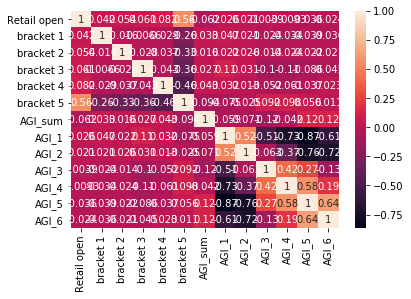

In [41]:
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)